<a href="https://colab.research.google.com/github/bagascahyawiguna/ImageClassification/blob/main/Dogs_vs_Cats_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [24]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import tensorflow as tf

# **Load Model**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving my_model.zip to my_model.zip


In [2]:
import zipfile

with zipfile.ZipFile("my_model.zip", 'r') as zip_ref:
    zip_ref.extractall("my_model")

In [15]:
import keras
import tensorflow as tf
from keras.layers import TFSMLayer
from keras.models import Sequential
from keras.layers import Input

layer = TFSMLayer("my_model", call_endpoint="serving_default")

model = Sequential([
    Input(shape=(150, 150, 3)),
    layer
])

In [20]:
imported = tf.saved_model.load('my_model')
print(list(imported.signatures['serving_default'].structured_outputs.keys()))

['output_0']


# **Inference Test**

In [17]:
from google.colab import files

uploaded = files.upload()

Saving cat.10531.jpg to cat.10531 (1).jpg


In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi [0, 1] (sesuai training)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension
    return img_array

Saving dog.10010.jpg to dog.10010.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


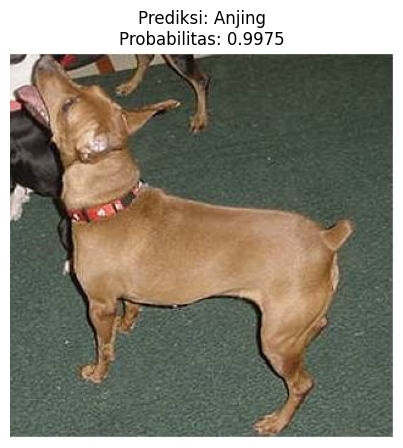

In [28]:
from google.colab import files

# Upload gambar
uploaded = files.upload()
img_path = list(uploaded.keys())[0]  # Ambil nama file

# Preprocess gambar
img = Image.open(img_path)
img_processed = preprocess_image(img_path)

prediction = model.predict(img_processed)
prob = prediction['output_0'][0][0]
label = "Anjing" if prob > 0.5 else "Kucing"
confidence = prob if prob > 0.5 else 1 - prob

# Tampilkan gambar dan hasil
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"Prediksi: {label}\nProbabilitas: {confidence:.4f}", fontsize=12)
plt.axis('off')
plt.show()

Saving cat.10531.jpg to cat.10531 (7).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


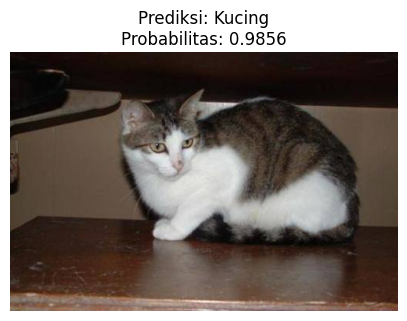

In [29]:
from google.colab import files

# Upload gambar
uploaded = files.upload()
img_path = list(uploaded.keys())[0]  # Ambil nama file

# Preprocess gambar
img = Image.open(img_path)
img_processed = preprocess_image(img_path)

prediction = model.predict(img_processed)
prob = prediction['output_0'][0][0]
label = "Anjing" if prob > 0.5 else "Kucing"
confidence = prob if prob > 0.5 else 1 - prob

# Tampilkan gambar dan hasil
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"Prediksi: {label}\nProbabilitas: {confidence:.4f}", fontsize=12)
plt.axis('off')
plt.show()